In [5]:
%load_ext autoreload
%autoreload 2

from synchronization import plots
from synchronization import runner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration

This Notebook is used to explore different parameter settings manually.


initializing net ...
initialization time: 0.18114185333251953s
------------------ running network!
runtime: 8.9
Generate PSD plot ...


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x135800160>)

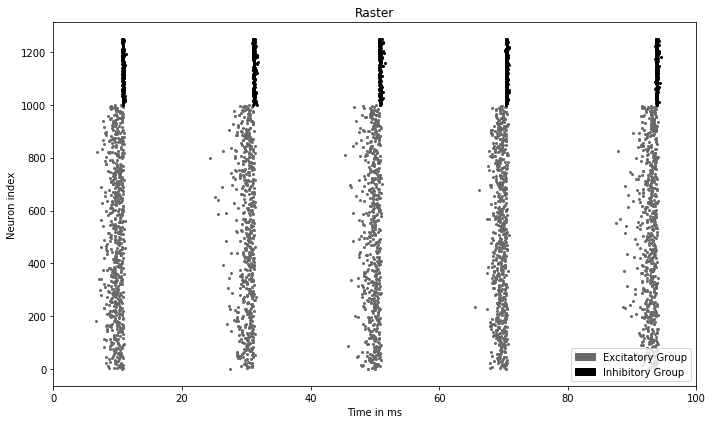

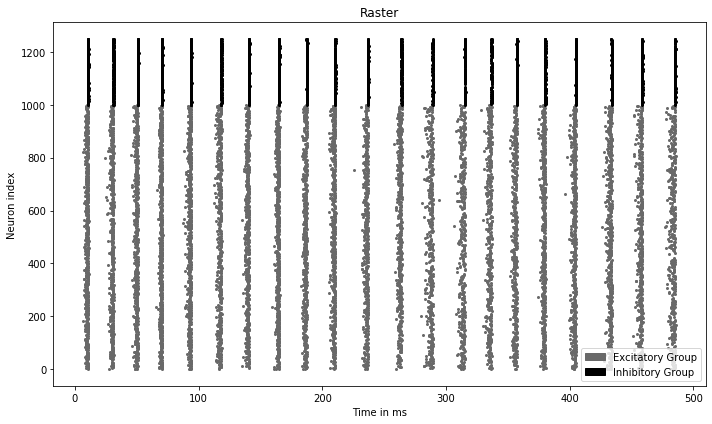

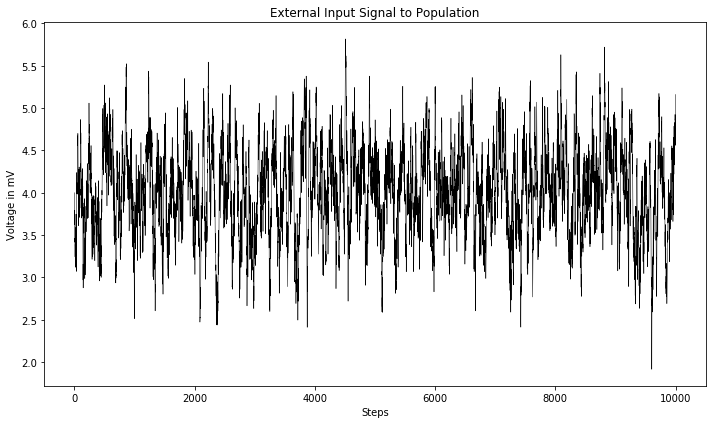

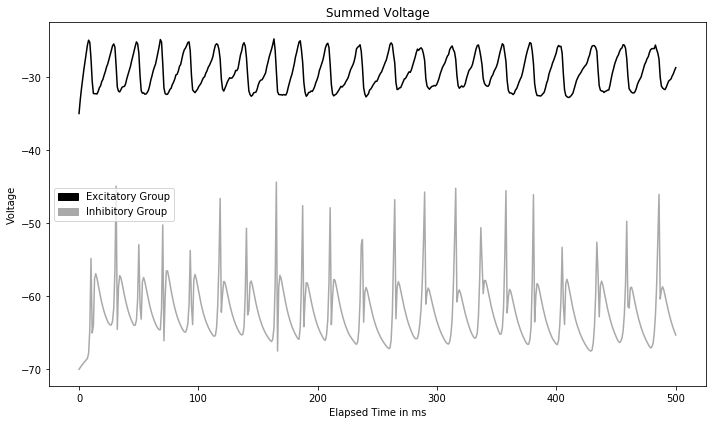

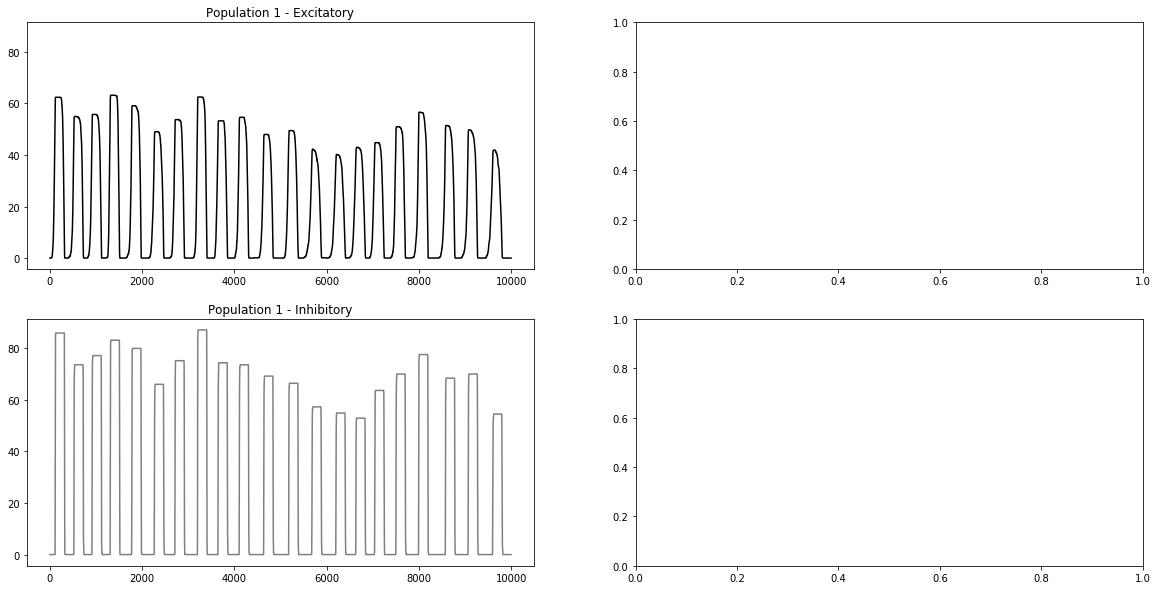

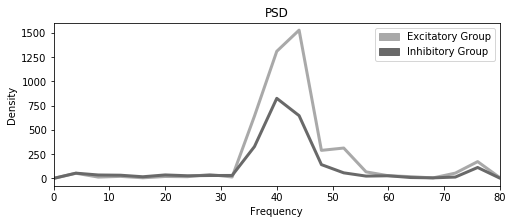

In [6]:
model = runner.run(modified_params={'tau_GABA': 5.0})

plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(params=model["params"])
plots.lfp(model=model)
plots.population_rates(model)
plots.psd(title="PSD", model=model)


# Finding appropriate value for GABA decay time.

In [7]:
models = [
    runner.run(modified_params={'tau_GABA': 3.0}),
    runner.run(modified_params={'tau_GABA': 5.0}),
    runner.run(modified_params={'tau_GABA': 7.0}),
    runner.run(modified_params={'tau_GABA': 9.0})
]

initializing net ...
initialization time: 0.12362289428710938s
------------------ running network!
runtime: 6.8
initializing net ...
initialization time: 0.132843017578125s
------------------ running network!
runtime: 6.5
initializing net ...
initialization time: 0.12711000442504883s
------------------ running network!
runtime: 7.4
initializing net ...
initialization time: 0.1357250213623047s
------------------ running network!
runtime: 8.7


INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...


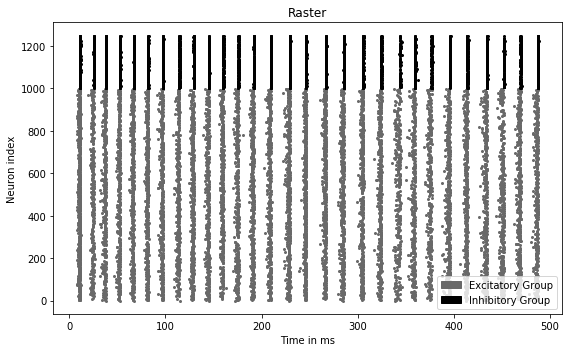

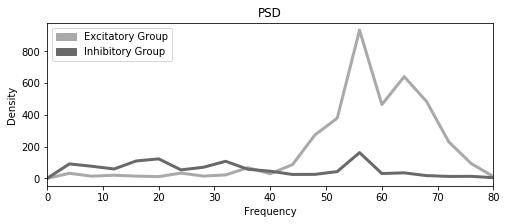

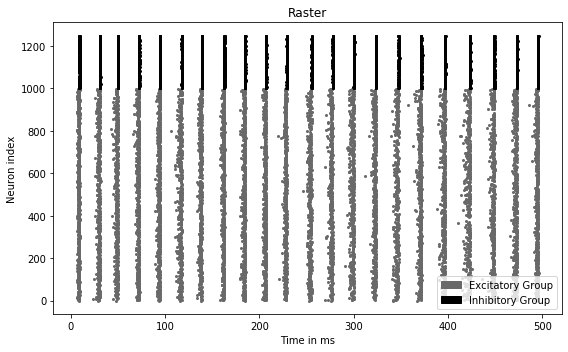

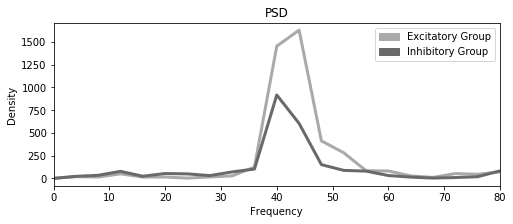

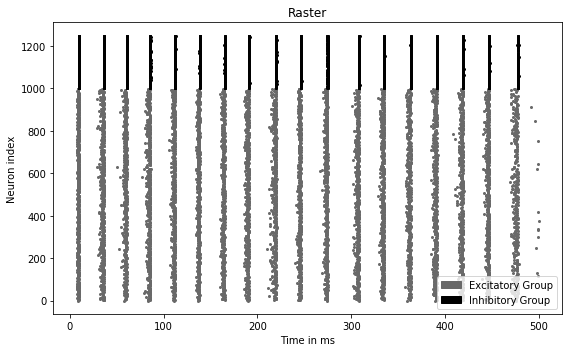

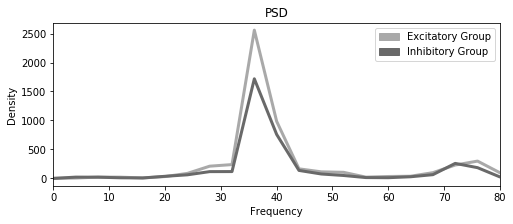

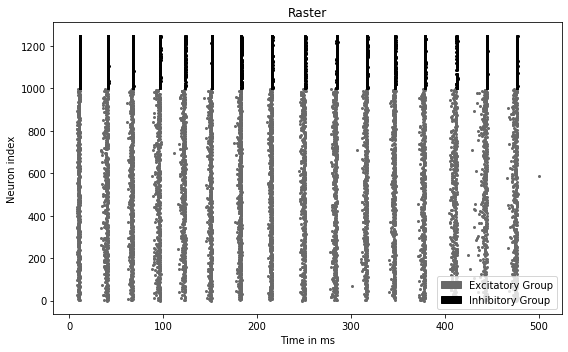

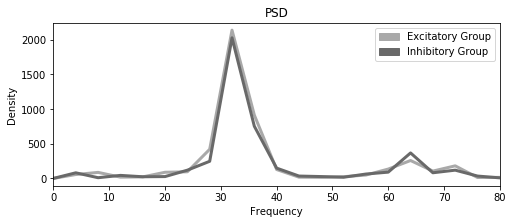

In [8]:
FIG_SIZE = (8, 5)
for model in models:
    plots.raster(model=model, fig_size=FIG_SIZE)
    plots.psd(model, "PSD")
    